## Young people survey
### 사용 데이터
- [Young People Survey](https://www.kaggle.com/datasets/miroslavsabo/young-people-survey)
- Data Description
  - Music preferences (19 items)
  - Movie preferences (12 items)
  - Hobbies & interests (32 items)
  - Phobias (10 items)
  - Health habits (3 items)
  - Personality traits, views on life, & opinions (57 items)
  - Spending habits (7 items)
  - Demographics (10 items)

In [48]:
music = 19
movie = 12
hobbies_interests = 32
phobias = 10
health_habits = 3
personality_traits = 57
spending_habits = 7
demographics = 10

### FEAR OF PUBLIC SPEAKING
대중 연설(발표)에 두려움이 있는 사람에 대해서 알아보고자 한다.

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# plt.style.available
plt.style.use('default')

data = pd.read_csv("./responses.csv")
df = data.copy()
print(df.shape)

(1010, 150)


In [50]:
df_columns = pd.read_csv("./columns.csv")
print(df_columns.shape)

(150, 2)


In [51]:
to_drop_columns = list(df_columns[:music+movie].short)

In [52]:
young = df.drop(to_drop_columns, axis=1)
print(young.columns)
print(young.shape)

Index(['History', 'Psychology', 'Politics', 'Mathematics', 'Physics',
       'Internet', 'PC', 'Economy Management', 'Biology', 'Chemistry',
       ...
       'Age', 'Height', 'Weight', 'Number of siblings', 'Gender',
       'Left - right handed', 'Education', 'Only child', 'Village - town',
       'House - block of flats'],
      dtype='object', length=119)
(1010, 119)


In [53]:
young.isnull().sum()

History                   2
Psychology                5
Politics                  1
Mathematics               3
Physics                   3
                         ..
Left - right handed       3
Education                 1
Only child                2
Village - town            4
House - block of flats    4
Length: 119, dtype: int64

<AxesSubplot:>

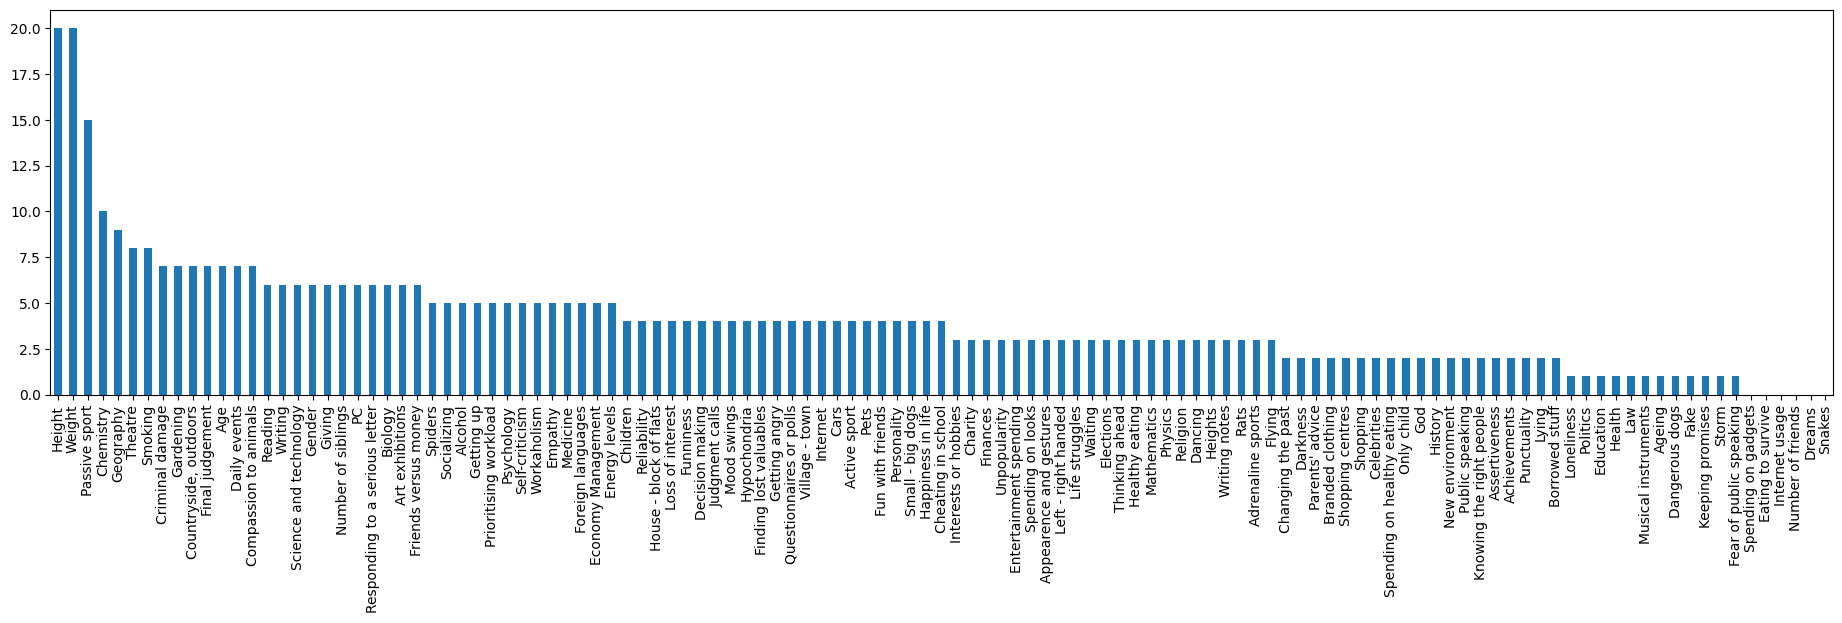

In [54]:
nulls = young.isnull().sum().sort_values(ascending=False)
nulls.plot(kind='bar', figsize=(23, 5))

In [55]:
young.drop(['Height','Weight','Only child','House - block of flats','Smoking','Alcohol','Healthy eating'], axis=1, inplace=True)

In [56]:
young = young.dropna()
young.isnull().sum()

History                0
Psychology             0
Politics               0
Mathematics            0
Physics                0
                      ..
Number of siblings     0
Gender                 0
Left - right handed    0
Education              0
Village - town         0
Length: 112, dtype: int64

In [57]:
young.duplicated().sum()

0

<AxesSubplot:xlabel='Fear of public speaking', ylabel='count'>

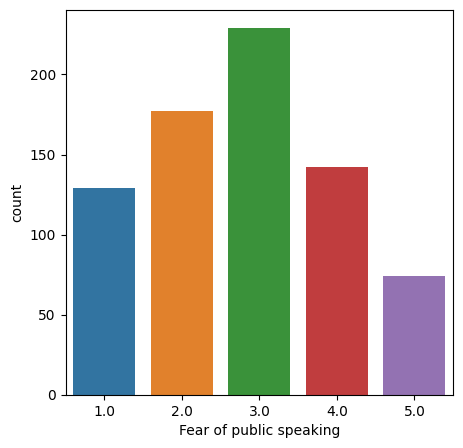

In [58]:
# Fear of public speaking
fig, ax = plt.subplots(figsize = (5,5))
sns.countplot(x='Fear of public speaking', data=young, ax=ax)

#### correlation analysis
1. Hobbies & interests 
2. Personality traits, views on life, & opinions 
3. Spending habits 

In [59]:
# Hobbies & interests
import scipy.stats as stats
interest_lst = list(df_columns[music+movie:music+movie+hobbies_interests].short)
# 서열척도이므로 스피어만 상관계수 사용
corr_lst = young[interest_lst].apply(lambda x: stats.spearmanr(x, young['Fear of public speaking']), axis=0)

for k in range(corr_lst.shape[1]):
  if corr_lst.iloc[:,k][1] < 0.05:
    print(f'{interest_lst[k]} ({corr_lst.iloc[:,k][0]}, {corr_lst.iloc[:,k][1]})')


History (-0.09960708405114807, 0.0062966402840290035)
Politics (-0.19112221771416527, 1.3089746070707673e-07)
Physics (-0.07417496631925287, 0.0421402006213192)
Economy Management (-0.08619482888314446, 0.018148253079883162)
Biology (0.07811652511024895, 0.03231918093131169)
Law (-0.2087598949648501, 7.688308674212924e-09)
Cars (-0.08144107141762123, 0.025626021542715913)
Dancing (-0.10533739601836502, 0.0038531394013111035)
Musical instruments (-0.0741026095501303, 0.042341788595799776)
Active sport (-0.14604495649005225, 5.890309861248442e-05)
Celebrities (0.08361021266696031, 0.021935510378669476)
Fun with friends (-0.10159149333387077, 0.005325974535260903)
Adrenaline sports (-0.10361267013552887, 0.0044780238098848435)


In [60]:
# Personality traits, views on life, & opinions 
from_val = music+movie+hobbies_interests+phobias+health_habits
to_val = from_val + personality_traits
interest_lst = list(df_columns[from_val:to_val].short)

# young[interest_lst].dtypes
temp = young[interest_lst].copy()
deleted_lst = interest_lst.copy()
for i in range(personality_traits):
  if temp[interest_lst[i]].dtype == 'object':
    temp.drop([interest_lst[i]], axis=1, inplace=True)
    deleted_lst.remove(interest_lst[i])

print(temp.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 0 to 1009
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Daily events                    751 non-null    float64
 1   Prioritising workload           751 non-null    float64
 2   Writing notes                   751 non-null    float64
 3   Workaholism                     751 non-null    float64
 4   Thinking ahead                  751 non-null    float64
 5   Final judgement                 751 non-null    float64
 6   Reliability                     751 non-null    float64
 7   Keeping promises                751 non-null    float64
 8   Loss of interest                751 non-null    float64
 9   Friends versus money            751 non-null    float64
 10  Funniness                       751 non-null    float64
 11  Fake                            751 non-null    float64
 12  Criminal damage                 751

In [61]:
corr_lst = temp.apply(lambda x: stats.spearmanr(x, young['Fear of public speaking']), axis=0)

short_name = []
for k in range(corr_lst.shape[1]):
  if corr_lst.iloc[:,k][1] < 0.05 and abs(corr_lst.iloc[:,k][0]) >= 0.1:
    print(f'{deleted_lst[k]} ({corr_lst.iloc[:,k][0]}, {corr_lst.iloc[:,k][1]})')
    short_name.append(deleted_lst[k]) 

Daily events (-0.12087285501766108, 0.000903065968463293)
Fake (0.12601980518611708, 0.0005370725125290263)
Decision making (0.15493034576355266, 2.003750140365593e-05)
Judgment calls (-0.126930479020194, 0.0004888932195239257)
Hypochondria (0.1268852714194349, 0.0004911867624453558)
Loneliness (0.2182165527947675, 1.5117864755463781e-09)
Health (0.12109613234637676, 0.000883294161296598)
Changing the past (0.19667706689287243, 5.510592516607353e-08)
Number of friends (-0.28838057415108453, 7.52958369679082e-16)
Waiting (-0.11079833111455091, 0.0023605361418025175)
New environment (-0.2914452005655063, 3.60401147526724e-16)
Mood swings (0.15004014362443643, 3.654565745097885e-05)
Appearence and gestures (-0.10869508423617978, 0.0028581061792354633)
Socializing (-0.2880523513695705, 8.143485822802263e-16)
Assertiveness (-0.21486370443738037, 2.7143279861988677e-09)
Knowing the right people (-0.15660747380663495, 1.623633038934309e-05)
Public speaking (0.5094163493597413, 7.7961578019545

In [62]:
# Spending habits 
from_val = music + movie + hobbies_interests + phobias+health_habits + personality_traits
to_val = from_val + spending_habits
interest_lst = list(df_columns[from_val:to_val].short)

corr_lst = []
for i in range(spending_habits):
  corr_lst.append(stats.spearmanr(young[interest_lst][interest_lst[i]], young['Fear of public speaking']))

for k in range(len(corr_lst)):
  if corr_lst[k][1] < 0.05:
    print(interest_lst[k], corr_lst[k])

Finances SpearmanrResult(correlation=0.08061796098378303, pvalue=0.027160601760673156)
Branded clothing SpearmanrResult(correlation=-0.08741604464542205, pvalue=0.01656693173112058)
Entertainment spending SpearmanrResult(correlation=-0.12024414709709028, pvalue=0.0009609602362526946)
Spending on looks SpearmanrResult(correlation=-0.099692464356908, pvalue=0.0062518074942504425)


가외변인(제3의 변인, 통제 변인)을 생각하지 않고 단순 상관관계를 구했을 때,
Phobias의 'Fear of public speaking' 요인은 Personality traits, views on life, & opinions 의 항목들과
상관이 좀 더 있는 것으로 보인다.

In [63]:
short_name

['Daily events',
 'Fake',
 'Decision making',
 'Judgment calls',
 'Hypochondria',
 'Loneliness',
 'Health',
 'Changing the past',
 'Number of friends',
 'Waiting',
 'New environment',
 'Mood swings',
 'Appearence and gestures',
 'Socializing',
 'Assertiveness',
 'Knowing the right people',
 'Public speaking',
 'Happiness in life',
 'Energy levels',
 'Personality',
 'Interests or hobbies']

In [64]:
print(df_columns.columns)
# df_columns.rename(columns={df_columns.columns[0]:df_columns.columns[0].replace(" ","")}, inplace=True)
df_columns.rename(columns={df_columns.columns[0]:df_columns.columns[0].strip()}, inplace=True)
print(df_columns.columns)

Index(['original                                                                        ', 'short'], dtype='object')
Index(['original', 'short'], dtype='object')


In [65]:
# df_columns.loc[df_columns['short'].isin(short_name) == True, 'original']
# 전체 문장을 보고 싶었으나, 문장이 너무 길어 확인이 되지 않는다.

interest_columns = df_columns.loc[df_columns['short'].isin(short_name) == True].reset_index(drop=True)
interest_columns

,original,short
0,I take notice of what goes on around me. ...,Daily events
1,I can be two faced sometimes. ...,Fake
2,I take my time to make decisions. ...,Decision making
3,I can tell if people listen to me or not when ...,Judgment calls
4,I am a hypochondriac. ...,Hypochondria
5,I feel lonely in life. ...,Loneliness
6,I worry about my health. ...,Health
7,I wish I could change the past because of the ...,Changing the past
8,I have lots of friends. ...,Number of friends
9,I am very patient. ...,Waiting


In [66]:
personal_trait = young[list(interest_columns['short'])].copy()
interest_columns['r'] = np.nan
interest_columns['p-value'] = np.nan

for i in range(personal_trait.shape[1]):
  corr_value = stats.spearmanr(personal_trait[short_name[i]], young['Fear of public speaking'])
  interest_columns['r'][i] = corr_value[0]
  interest_columns['p-value'][i]  = corr_value[1]

C:\Users\12yoo\AppData\Local\Temp\ipykernel_16280\3474435987.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interest_columns['r'][i] = corr_value[0]
C:\Users\12yoo\AppData\Local\Temp\ipykernel_16280\3474435987.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interest_columns['p-value'][i]  = corr_value[1]


In [67]:
interest_columns.sort_values(by='r', ascending=False)

,original,short,r,p-value
16,I have to be well prepared before public speak...,Public speaking,0.509416,7.796158e-51
5,I feel lonely in life. ...,Loneliness,0.218217,1.511786e-09
7,I wish I could change the past because of the ...,Changing the past,0.196677,5.510593e-08
2,I take my time to make decisions. ...,Decision making,0.154930,2.003750e-05
11,My moods change quickly. ...,Mood swings,0.150040,3.654566e-05
4,I am a hypochondriac. ...,Hypochondria,0.126885,4.911868e-04
1,I can be two faced sometimes. ...,Fake,0.126020,5.370725e-04
6,I worry about my health. ...,Health,0.121096,8.832942e-04
12,I am well mannered and I look after my appeara...,Appearence and gestures,-0.108695,2.858106e-03
9,I am very patient. ...,Waiting,-0.110798,2.360536e-03


personal trait 내에서의 상관관계는 어떻게 될까?

C:\Users\12yoo\AppData\Local\Temp\ipykernel_16280\2562925515.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(temp_corr, dtype=np.bool)


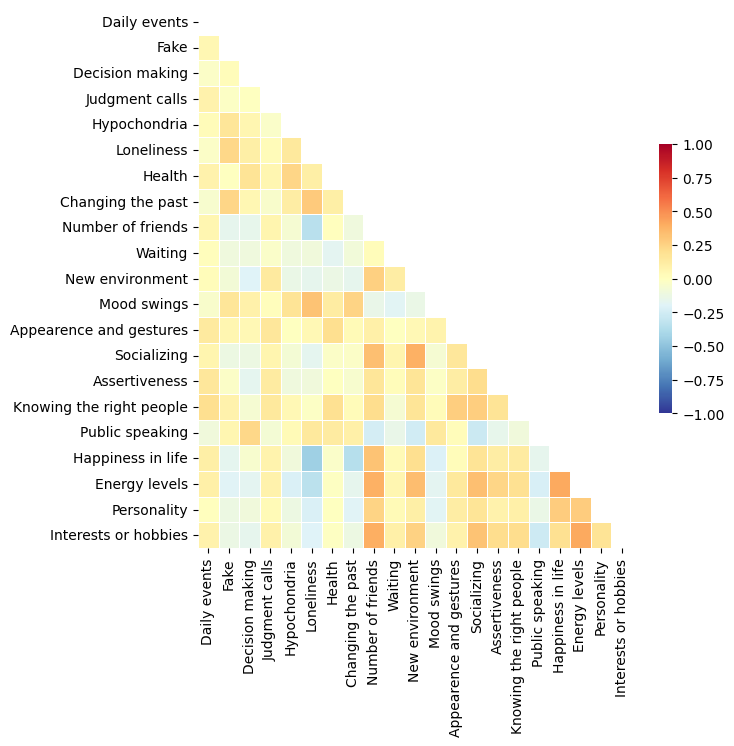

In [83]:
temp_corr = personal_trait.corr(method='spearman')
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(temp_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(temp_corr, 
            cmap = 'RdYlBu_r', # Red, Yellow, Blue
            annot = False,   # 실제 값을 표시하지 않는다.
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5}, # 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

# temp_corr['Public speaking']
# temp_corr['Public speaking'].loc['Decision making']

1. 발표의 어려움이 있는 사람은 새로운 환경에 적응하는 것에도 어려움이 있는 것으로 보인다. 
2. 또한, 이러한 특징들이 높은 사람은 외로움을 느끼거나 사회화에 어려움을 겪는 경향이 있을 가능성이 있다.
3. 하지만 이 분석은 제 3의 변인을 고려하지 않았으므로 해석에 특히 더 주의해야 한다.

#### Gender
성별에 따라서도 다를까?

In [69]:
a = young.groupby('Gender').describe()
a['Fear of public speaking']

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
female,447.0,2.923937,1.239678,1.0,2.0,3.0,4.0,5.0
male,304.0,2.634868,1.152513,1.0,2.0,3.0,3.0,5.0


<AxesSubplot:xlabel='Gender', ylabel='Fear of public speaking'>

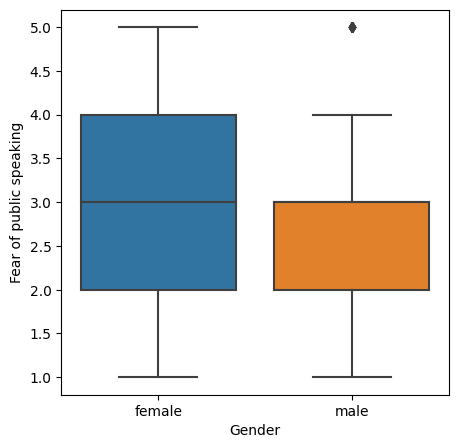

In [70]:
fig, ax = plt.subplots(figsize = (5,5))
sns.boxplot(x="Gender", y="Fear of public speaking", data=young)

In [71]:
female_data = young.loc[young['Gender'] == 'female']
male_data = young.loc[young['Gender'] == 'male']

In [72]:
len(male_data.loc[male_data['Fear of public speaking'] == 5.0])
# 5점 응답의 개수가 남성의 대답에서 상당히 적지만, 3 표준편차를 벗어나지는 않으므로 일단 극단치로 취급하지 않기로 한다.

16

In [73]:
from scipy import stats
lresult = stats.levene(female_data['Fear of public speaking'], male_data['Fear of public speaking'])
print('LeveneResult(F) : %.3f \np-value : %.3f' % (lresult)) # 등분산 검정
result = stats.ttest_ind(female_data['Fear of public speaking'], male_data['Fear of public speaking'], equal_var=True)
print('t statistic : %.3f \np-value : %.3f' % (result))

LeveneResult(F) : 0.403 
p-value : 0.526
t statistic : 3.226 
p-value : 0.001


=> 독립표본 t-검정 결과 t값이 3.23, p-value가 0.001으로 신뢰수준 99% 하에서 "Fear of public speaking에 관해 성별에 따른 차이가 없다"는 가설을 기각한다.

In [74]:
# 서열척도이기 때문에 정규성 가정을 만족하지 못할 수도 있어서 Mann-Whitney U 검정도 확인
stats.mannwhitneyu(female_data['Fear of public speaking'], male_data['Fear of public speaking'])

MannwhitneyuResult(statistic=76477.0, pvalue=0.0026419692708866656)

#### Partial correlation

성별에 따른 분석 결과에 따라 성별을 더미변수로 넣어 상관분석을 편상관분석으로 다시 해보고자 한다.

In [75]:
young_dummy = pd.get_dummies(young, columns = ['Gender'])

In [76]:
interest_columns.sort_values(by='r', ascending=False)

,original,short,r,p-value
16,I have to be well prepared before public speak...,Public speaking,0.509416,7.796158e-51
5,I feel lonely in life. ...,Loneliness,0.218217,1.511786e-09
7,I wish I could change the past because of the ...,Changing the past,0.196677,5.510593e-08
2,I take my time to make decisions. ...,Decision making,0.154930,2.003750e-05
11,My moods change quickly. ...,Mood swings,0.150040,3.654566e-05
4,I am a hypochondriac. ...,Hypochondria,0.126885,4.911868e-04
1,I can be two faced sometimes. ...,Fake,0.126020,5.370725e-04
6,I worry about my health. ...,Health,0.121096,8.832942e-04
12,I am well mannered and I look after my appeara...,Appearence and gestures,-0.108695,2.858106e-03
9,I am very patient. ...,Waiting,-0.110798,2.360536e-03


In [77]:
import pingouin as pg

pg.partial_corr(data=young_dummy, x='Socializing', y='Fear of public speaking', covar=['Gender_female', 'Gender_male'], method='spearman')

,n,r,CI95%,p-val
spearman,751,-0.296382,"[-0.36, -0.23]",1.184594e-16


In [78]:
pg.partial_corr(data=young_dummy, x='Number of friends', y='Fear of public speaking', covar=['Gender_female', 'Gender_male'], method='spearman')

,n,r,CI95%,p-val
spearman,751,-0.289834,"[-0.35, -0.22]",5.810307e-16


In [79]:
pg.partial_corr(data=young_dummy, x='New environment', y='Fear of public speaking', covar=['Gender_female', 'Gender_male'], method='spearman')

,n,r,CI95%,p-val
spearman,751,-0.289521,"[-0.35, -0.22]",6.261629e-16


In [80]:
pg.partial_corr(data=young_dummy, x='Loneliness', y='Fear of public speaking', covar=['Gender_female', 'Gender_male'], method='spearman')

,n,r,CI95%,p-val
spearman,751,0.21134,"[0.14, 0.28]",5.209284e-09


In [81]:
pg.partial_corr(data=young_dummy, x='Public speaking', y='Fear of public speaking', covar=['Gender_female', 'Gender_male'], method='spearman')

,n,r,CI95%,p-val
spearman,751,0.502323,"[0.45, 0.55]",3.922444e-49


In [82]:
pg.partial_corr(data=young_dummy, x='Appearence and gestures', y='Fear of public speaking', covar=['Gender_female', 'Gender_male'], method='spearman')

,n,r,CI95%,p-val
spearman,751,-0.121696,"[-0.19, -0.05]",0.000846
